# quant-econ Solutions: Finite Markov Chains

Solutions for http://quant-econ.net/jl/finite_markov.html

In [1]:
using QuantEcon
using LaTeXStrings
using Plots
pyplot()

Plots.PyPlotBackend()

## Exercise 1

Compute the fraction of time that the worker spends unemployed,
and compare it to the stationary probability.

In [10]:
α = β = 0.1
N = 10000
p = β / (α + β)

P = [1-α  α   # Careful: P and p are distinct
     β  1-β]

mc = MarkovChain(P)

Discrete Markov Chain
stochastic matrix of type Array{Float64,2}:
2x2 Array{Float64,2}:
 0.9  0.1
 0.1  0.9


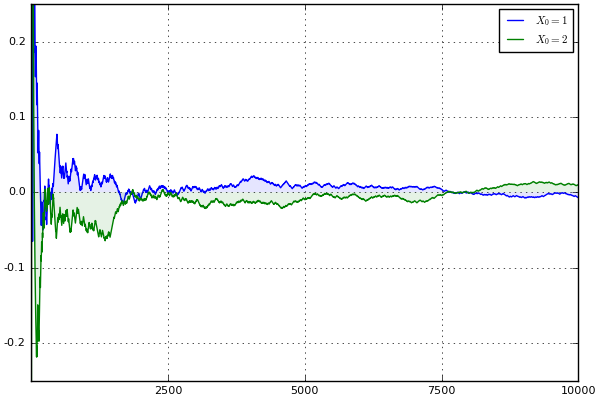

In [12]:
labels = []
y_vals = []

for x0 = 1:2
    # == Generate time series for worker that starts at x0 == #
    X = simulation(mc, N, x0)

    # == Compute fraction of time spent unemployed, for each n == #
    X_bar = cumsum(X.==1) ./ (collect(1:N))

    l = LaTeXString("\$X_0 = $x0\$")
    push!(labels, l)
    push!(y_vals, X_bar - p)
end

plot(y_vals, color=[:blue :green], fillrange=0, fillalpha=0.1,
ylims=(-0.25, 0.25), label=labels')

## Exercise 2

First save the data into a file called `web_graph_data.txt` by executing the next cell

In [4]:
f = open("web_graph_data.txt", "w")
contents = """a -> d;
a -> f;
b -> j;
b -> k;
b -> m;
c -> c;
c -> g;
c -> j;
c -> m;
d -> f;
d -> h;
d -> k;
e -> d;
e -> h;
e -> l;
f -> a;
f -> b;
f -> j;
f -> l;
g -> b;
g -> j;
h -> d;
h -> g;
h -> l;
h -> m;
i -> g;
i -> h;
i -> n;
j -> e;
j -> i;
j -> k;
k -> n;
l -> m;
m -> g;
n -> c;
n -> j;
n -> m;
"""
write(f, contents)
close(f)

In [5]:
#=
Return list of pages, ordered by rank
=#

infile = "web_graph_data.txt"
alphabet = "abcdefghijklmnopqrstuvwxyz"

n = 14 # Total number of web pages (nodes)

# == Create a matrix Q indicating existence of links == #
#  * Q[i, j] = 1 if there is a link from i to j
#  * Q[i, j] = 0 otherwise
Q = zeros(Int64, n, n)
f = open(infile, "r")
edges = readlines(f)
close(f)
for edge in edges
    from_node, to_node = matchall(r"\w", edge)
    i = searchindex(alphabet, from_node)
    j = searchindex(alphabet, to_node)
    Q[i, j] = 1
end

# == Create the corresponding Markov matrix P == #
P = Array(Float64, n, n)
for i=1:n
    P[i, :] = Q[i, :] / sum(Q[i, :])
end

mc = MarkovChain(P)

# == Compute the stationary distribution r == #
r = stationary_distributions(mc)[1]
ranked_pages = [alphabet[i] => r[i] for i=1:n]

# == Print solution, sorted from highest to lowest rank == #
println("Rankings\n ***")
sort_inds = reverse!(sortperm(collect(values(ranked_pages))))
the_keys = collect(keys(ranked_pages))
the_vals = collect(values(ranked_pages))
for i in sort_inds
    @printf("%s: %.4f\n", the_keys[i], the_vals[i])
end

Rankings
 ***
g: 0.1607
j: 0.1594
m: 0.1195
n: 0.1088
k: 0.0911
b: 0.0833
i: 0.0531
e: 0.0531
c: 0.0483
h: 0.0456
l: 0.0320
d: 0.0306
f: 0.0116
a: 0.0029


## Exercise 3

A solution from the [quantecon library](https://github.com/QuantEcon/QuantEcon.jl)  can be found [here](https://github.com/QuantEcon/QuantEcon.jl/blob/master/src/markov/markov_approx.jl)
